# Analize Decision Tree models

This notebook is responsible for taking valueble insights of the different Decision Tree models

### Import Statements

In [1]:
import pandas as pd
import os
import sys
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

p = os.path.abspath(os.path.join(os.path.dirname("__file__"), '..'))
sys.path.append(p)
from DecisionTree.ID3Tree import ID3Tree
from DecisionTree.Ruleset import Ruleset
from DecisionTree.Bootstrap_Aggregating import Bagging


In [2]:

file_path = os.path.join(p, 'datasets', 'decision_tree_data_AI_VS_AI.csv')
data = pd.read_csv(file_path, delimiter=';')
data

,ID3_Pred,Ruleset_Pred,Bagging_Pred,Actual
0,3,3,3,3
1,-1,5,6,6
2,3,3,3,3
3,4,0,3,4
4,2,2,2,2
...,...,...,...,...
2943,6,6,6,6
2944,1,1,1,1
2945,2,2,2,2
2946,6,6,6,6


In [3]:
def generate_metrics(y_pred, y_true):
    """
    Generate metrics for the given predictions and true labels.
    """

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted')

    return accuracy, precision, recall, f1



In [4]:
def plot_confusion_matrix(y_pred, y_true, col):
       
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {col}')
    plt.show()
    

Metrics for ID3 Tree model:
Accuracy: 0.7680, Precision: 0.7680, Recall: 0.7680, F1 Score: 0.7670


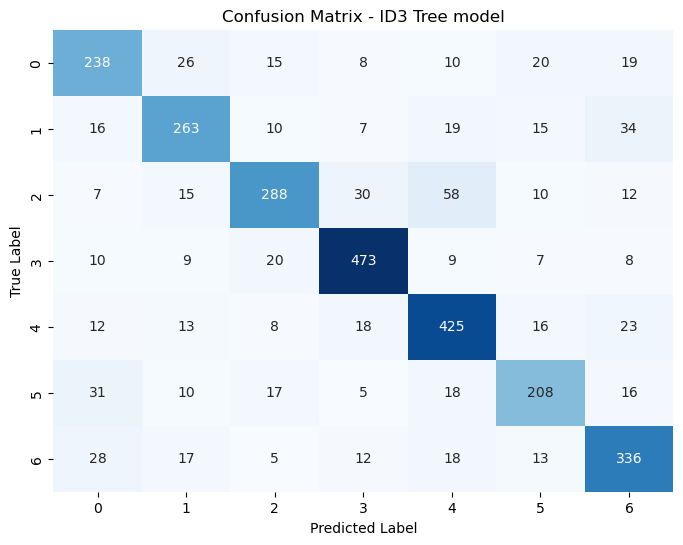

Metrics for Ruleset Tree model:
Accuracy: 0.7354, Precision: 0.7364, Recall: 0.7354, F1 Score: 0.7352


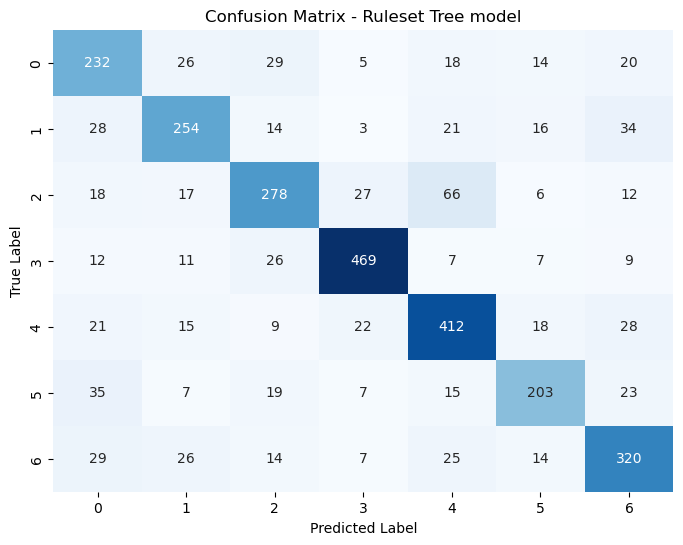

Metrics for Bagging Tree model:
Accuracy: 0.7364, Precision: 0.7505, Recall: 0.7364, F1 Score: 0.7302


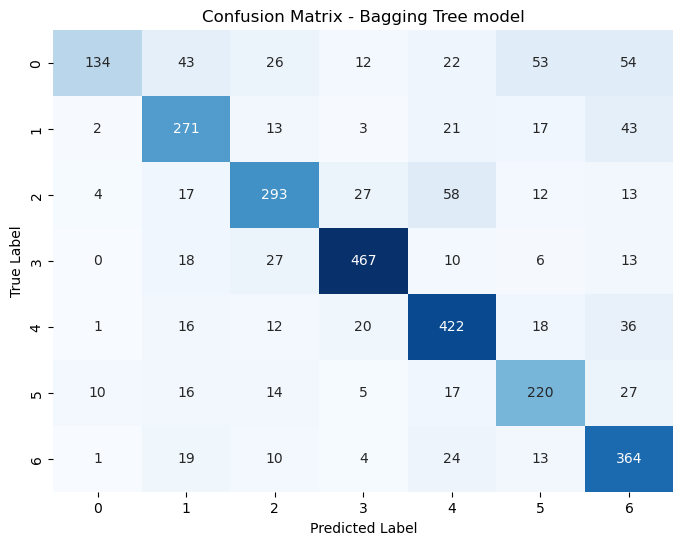

In [5]:
for col in data.columns[:-1]:
    y_pred = data[col]
    y_true = data['Actual']

    
    y_true = y_true[y_pred != -1]
    y_pred = y_pred[y_pred != -1]
   
    accuracy, precision, recall, f1 = generate_metrics(y_pred, y_true)
    print(f"Metrics for {col.split('_')[0]} Tree model:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    plot_confusion_matrix(y_pred, y_true, col.split('_')[0] + ' Tree model')

### Train Metrics

In [7]:
id3_tree = ID3Tree.load_model(os.path.join(p, 'models', 'id3_analize.pkl'))
ruleset = Ruleset.load_model(os.path.join(p, 'models', 'ruleset_analize.pkl'))
bagging = Bagging.load_model(os.path.join(p, 'models', 'bagging_analize.pkl'))

Model loaded from c:\Users\diogo\OneDrive\Documents\GitHub\MCTS_and_DecisionTree_for_ConnectFourGame\models\ruleset_analize.pkl


In [8]:

metrics = id3_tree.get_train_metrics()

print(f"Metrics for ID3 Tree model:")
print(f"Accuracy: {metrics['accuracy']:.4f}, Precision: {metrics['precision']:.4f}, Recall: {metrics['recall']:.4f}, F1 Score: {metrics['f1_score']:.4f}")

metrics = ruleset.get_train_metrics()
print(f"Metrics for Ruleset model:")
print(f"Accuracy: {metrics['accuracy']:.4f}, Precision: {metrics['precision']:.4f}, Recall: {metrics['recall']:.4f}, F1 Score: {metrics['f1_score']:.4f}")

metrics = bagging.get_train_metrics()
print(f"Metrics for Bagging model:")
print(f"Accuracy: {metrics['accuracy']:.4f}, Precision: {metrics['precision']:.4f}, Recall: {metrics['recall']:.4f}, F1 Score: {metrics['f1_score']:.4f}")


Metrics for ID3 Tree model:
Accuracy: 0.9092, Precision: 0.9098, Recall: 0.9092, F1 Score: 0.9086
Metrics for Ruleset model:
Accuracy: 0.8223, Precision: 0.8239, Recall: 0.8223, F1 Score: 0.8219
Metrics for Bagging model:
Accuracy: 0.8112, Precision: 0.8124, Recall: 0.8112, F1 Score: 0.8109
